# Домашнее задание

Будем прогнозировать количество проданного товара в городе Бангалор (Индия)

## Импорт библиотек и загрузка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


%matplotlib inline

pd.options.display.float_format = "{:.2f}".format

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 15)

# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/market_arrivals_ind.csv")

In [2]:
df.date = pd.DatetimeIndex(df.date)

# Отсортируем и добавим date в индекс
df = df.sort_values(by="date")
df.index = pd.PeriodIndex(df.date, freq="M")

In [ ]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


Оставим только данные по городу Бангалор

In [3]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [4]:
# Удалим лишние столбцы
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

In [ ]:
ts.head()

,quantity
date,
2004-01,227832
2004-02,225133
2004-03,221952
2004-04,185150
2004-05,137390


In [ ]:
type(ts.index[0])

pandas._libs.tslibs.period.Period

In [5]:
ts.index = ts.index.to_timestamp()

In [ ]:
ts.index[0]

Timestamp('2004-01-01 00:00:00', freq='MS')

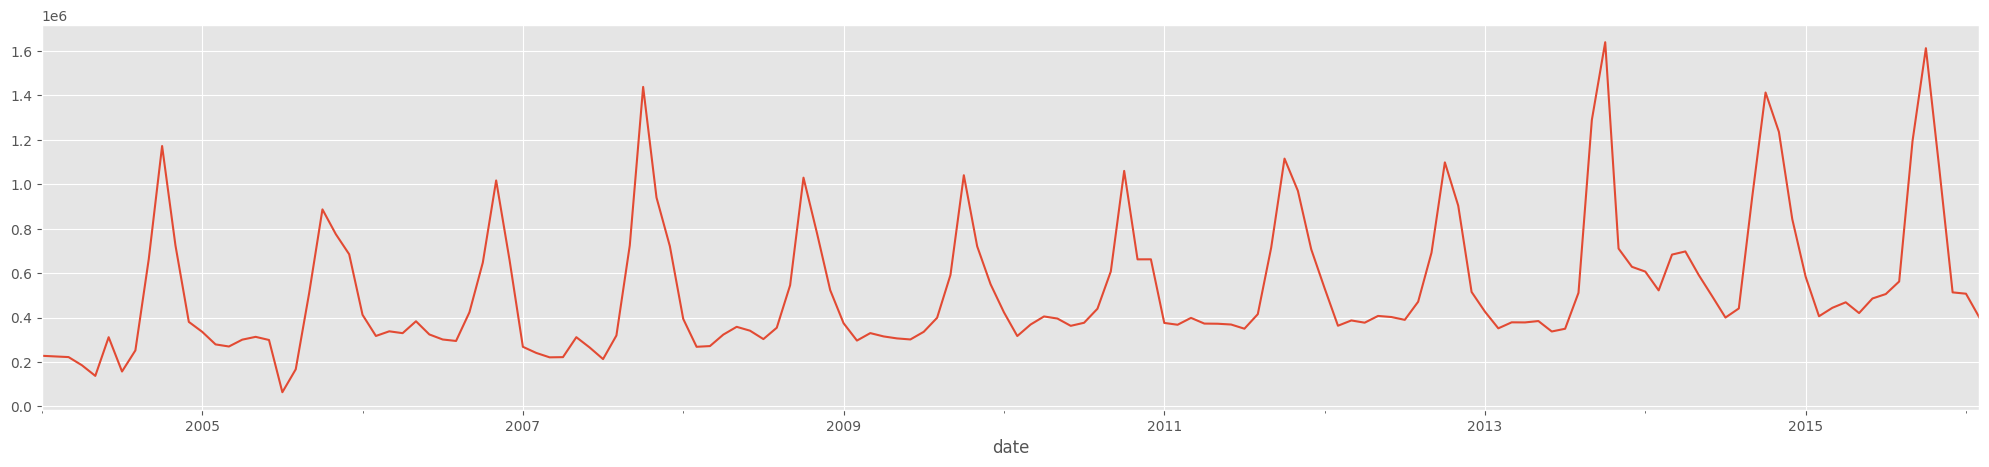

In [7]:
ts.quantity.plot(figsize=(25,5));

## Обучение адаптивных моделей

Разбейте данные (quantity) на train и test.

* train - первые 85% данных

* test - следующие 15% данных

Проверьте, что в тест попало 22 измерения.

In [6]:
ytest = ts.quantity[-22:]

In [7]:
ytrain = ts.quantity[:124]

Обучите следующие модели на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Простое экспоненциальное сглаживание с автоматически подбираемым $\alpha$

2) Модель Хольта (аддитивную) с автоматическим подбором гиперпараметров

3) Аддитивную модель Хольта с автоматическим подбором гиперпараметров и затухающим трендом

In [ ]:
!pip install orbit-ml -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.9/445.9 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 38.5 MB/s eta 0:00:00


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

# import orbit
# from orbit.utils.dataset import load_iclaims
# from orbit.models import ETS
# from orbit.diagnostics.plot import plot_predicted_data
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [13]:
# fit1 = SimpleExpSmoothing(ytrain, initialization_method="heuristic").fit()
fit1 = SimpleExpSmoothing(ytrain).fit()
# fit2 = Holt(ytrain, initialization_method="estimated").fit()
fit2 = Holt(ytrain).fit()
# fit3 = ExponentialSmoothing(ytrain, damped_trend=True, initialization_method="estimated").fit()
fit3 = ExponentialSmoothing(ytrain, trend="add", damped_trend=True).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


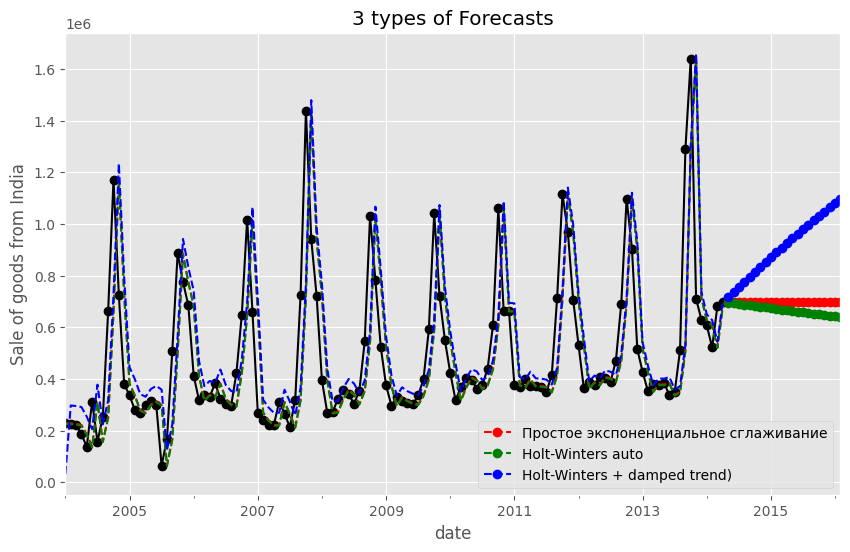

Figure 7.6: Forecasting Sale of goods from India using some adaptive methods


In [14]:
ax = ytrain.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="3 types of Forecasts",
)

ax.set_ylabel("Sale of goods from India")
ax.set_xlabel("Year")

fit1.fittedvalues.plot(ax=ax, style="--", color="red")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")
fit3.fittedvalues.plot(ax=ax, style="--", color="blue")

fit1.forecast(22).rename("Простое экспоненциальное сглаживание").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
fit2.forecast(22).rename("Holt-Winters auto").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)
fit3.forecast(22).rename("Holt-Winters + damped trend").plot(
    ax=ax, style="--", marker="o", color="blue", legend=True
)

plt.show()
print(
    "Forecasting Sale of goods from India using some adaptive methods"
)

## Quiz

У какой из трех обученных моделей самый быстро возрастающий тренд?

Обучите четыре модели Хольта-Винтерса на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Модель с аддитивными трендом и сезонностью

2) Модель с аддитивным трендом и мультипликативной сезонностью

3) Модель с аддитивными трендом и сезонностью и затухающим трендом

4) Модель с аддитивным трендом и мультипликативной сезонностью и затухающим трендом

C:\Users\maxle\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\maxle\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\maxle\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\maxle\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


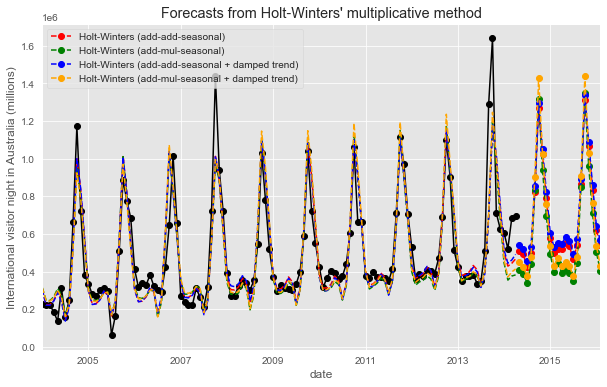

Forecasting Sale of goods from India using Holt-Winters method with both additive and multiplicative seasonality.


In [9]:
fit1 = ExponentialSmoothing(
    ytrain,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    use_boxcox=False,
    initialization_method="estimated",
).fit()

fit2 = ExponentialSmoothing(
    ytrain,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    use_boxcox=False,
    initialization_method="estimated",
).fit()

fit3 = ExponentialSmoothing(
    ytrain,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=False,
    initialization_method="estimated",
).fit()

fit4 = ExponentialSmoothing(
    ytrain,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=False,
    initialization_method="estimated",
).fit()

# results = pd.DataFrame(
#     index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
# )

ax = ytrain.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)

ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")

fit1.fittedvalues.plot(ax=ax, style="--", color="red")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")
fit3.fittedvalues.plot(ax=ax, style="--", color="blue")
fit4.fittedvalues.plot(ax=ax, style="--", color="orange")

fit1.forecast(22).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
fit2.forecast(22).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)
fit3.forecast(22).rename("Holt-Winters (add-add-seasonal + damped trend)").plot(
    ax=ax, style="--", marker="o", color="blue", legend=True
)
fit4.forecast(22).rename("Holt-Winters (add-mul-seasonal + damped trend)").plot(
    ax=ax, style="--", marker="o", color="orange", legend=True
)

plt.show()
print(
    "Forecasting Sale of goods from India using Holt-Winters method with both additive and multiplicative seasonality."
)

Вычислите RMSE (корень из среднеквадратичной ошибки) на тестовых данных для каждого из четырех прогнозов.

In [10]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(ytest, fit1.forecast(22)))
print(mean_squared_error(ytest, fit2.forecast(22)))
print(mean_squared_error(ytest, fit3.forecast(22)))
print(mean_squared_error(ytest, fit4.forecast(22)))

21157621692.87939
21794746591.82015
21364308399.471775
13230977229.346968


## Quiz

Какая модель справилась лучше остальных?

Holt-Winters (add-mul-seasonal + damped trend)

## Quiz

Чему равно значение RMSE для лучшей модели? Ответ округлите до целого числа.

In [20]:
round(mean_squared_error(ytest, fit4.forecast(22)))

12972835067

В предыдущем домашнем задании мы работали с логарифмированным рядом и вычисляли RMSE для него.

Вычислите ошибки последних четырех моделей для логарифмов правильных ответов и прогнозов.

In [22]:
from copy import deepcopy

ts_boxcox = deepcopy(ts)

ts_boxcox['boxcox_quantity'] = np.log(ts['quantity'])

In [24]:
ts_boxcox.drop(columns='quantity', inplace=True)

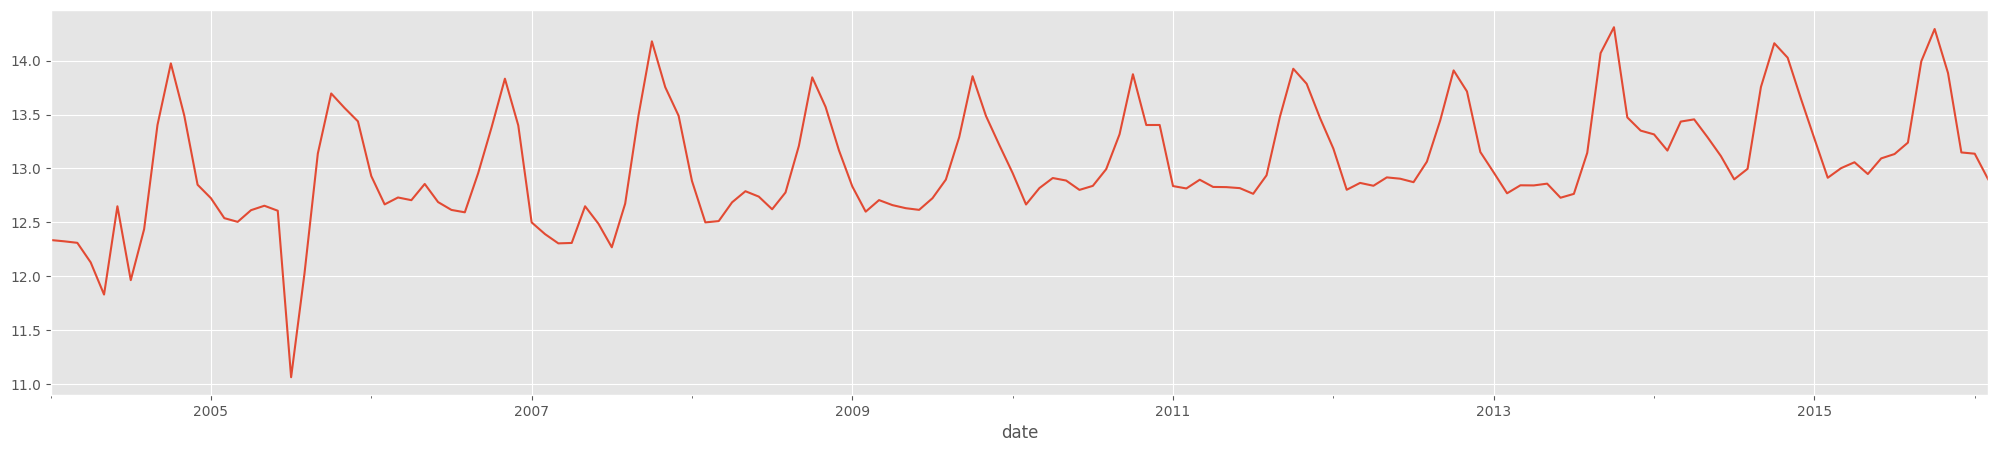

In [26]:
ts_boxcox.boxcox_quantity.plot(figsize=(25,5));

In [28]:
y_test = ts_boxcox.boxcox_quantity[-22:]
y_train = ts_boxcox.boxcox_quantity[:124]

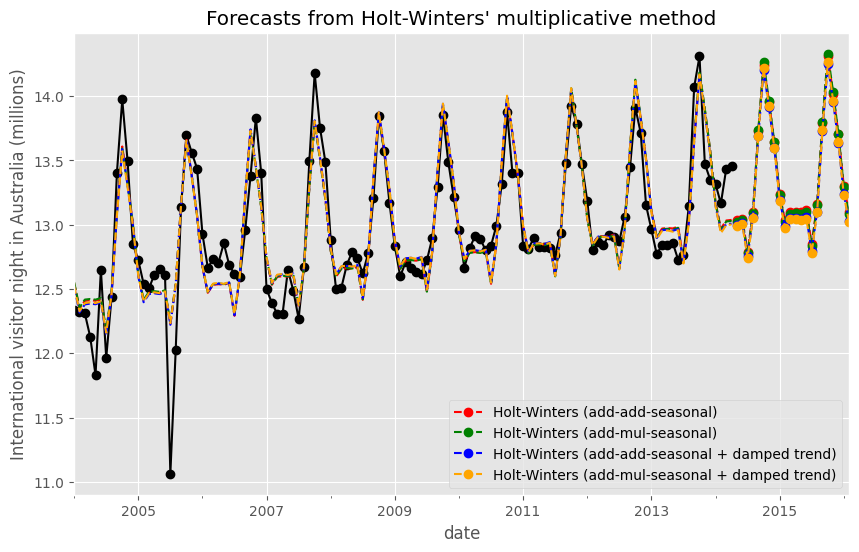

Forecasting Sale of goods from India using Holt-Winters method with both additive and multiplicative seasonality.


In [29]:
fit1 = ExponentialSmoothing(
    y_train,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fit2 = ExponentialSmoothing(
    y_train,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fit3 = ExponentialSmoothing(
    y_train,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fit4 = ExponentialSmoothing(
    y_train,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()

# results = pd.DataFrame(
#     index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
# )

ax = y_train.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)

ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")

fit1.fittedvalues.plot(ax=ax, style="--", color="red")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")
fit3.fittedvalues.plot(ax=ax, style="--", color="blue")
fit4.fittedvalues.plot(ax=ax, style="--", color="orange")

fit1.forecast(22).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
fit2.forecast(22).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)
fit3.forecast(22).rename("Holt-Winters (add-add-seasonal + damped trend)").plot(
    ax=ax, style="--", marker="o", color="blue", legend=True
)
fit4.forecast(22).rename("Holt-Winters (add-mul-seasonal + damped trend)").plot(
    ax=ax, style="--", marker="o", color="orange", legend=True
)

plt.show()
print(
    "Forecasting Sale of goods from India using Holt-Winters method with both additive and multiplicative seasonality."
)

In [30]:
print(mean_squared_error(y_test, fit1.forecast(22)))
print(mean_squared_error(y_test, fit2.forecast(22)))
print(mean_squared_error(y_test, fit3.forecast(22)))
print(mean_squared_error(y_test, fit4.forecast(22)))

0.03054369535665707
0.03095830142899333
0.02919788725639373
0.029779687699970192


## Quiz

Какое семейство моделей лучше справилось с решением задачи:
SARIMAX или модели Хольта-Винтерса?

Хольта-Винтерса

## Опциональное задание (без проверки)

Воспользуйтесь экспоненциальными моделями из библиотеки Orbit для получения прогноза в данной задаче.

In [ ]:
# ваш код здесь